# Decision Tree Classifier on Iris Dataset
**Author**: Mubasir Anwar  
**Date**: 27/4/2025


# 1. Introduction
In this project, we aim to build a Decision Tree Classifier to predict the species of the famous Iris dataset. We perform exploratory data analysis, model training, hyperparameter tuning, and visualization to fully understand and optimize our model.

The **Iris dataset** is one of the most famous and widely used datasets in the field of machine learning and statistics. Collected by British biologist and statistician **Ronald A. Fisher** in 1936, it consists of **150 samples** from three different species of Iris flowers: *setosa*, *versicolor*, and *virginica*. 

Each sample includes **four features**:

- Sepal Length (in cm)
- Sepal Width (in cm)
- Petal Length (in cm)
- Petal Width (in cm)

The goal is to predict the species of an iris flower based on these measurements. Because of its simplicity yet richness, the Iris dataset is often used for testing classification algorithms and for educational purposes in pattern recognition and machine learning.


# 2. Importing Required Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


We import necessary libraries for data manipulation, visualization, and machine learning:

- **numpy, pandas**: Data handling.
- **matplotlib, seaborn**: Visualization tools.
- **%matplotlib inline**: To render plots within the notebook.


# 3. Data Loading
We load the Iris dataset and inspect the first few records.


In [20]:
iris = pd.read_csv('IRIS.csv')


# 4. Initial Data Exploration
In this section, we perform some basic exploratory data analysis (EDA) to understand the structure of the dataset, check for missing values, and visualize the data distribution.


In [23]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 5. Exploratory Data Analysis (EDA)
In this section, we perform an in-depth exploratory data analysis (EDA) to better understand the relationships between different features, check for correlations, and visualize the distribution of the target variable.


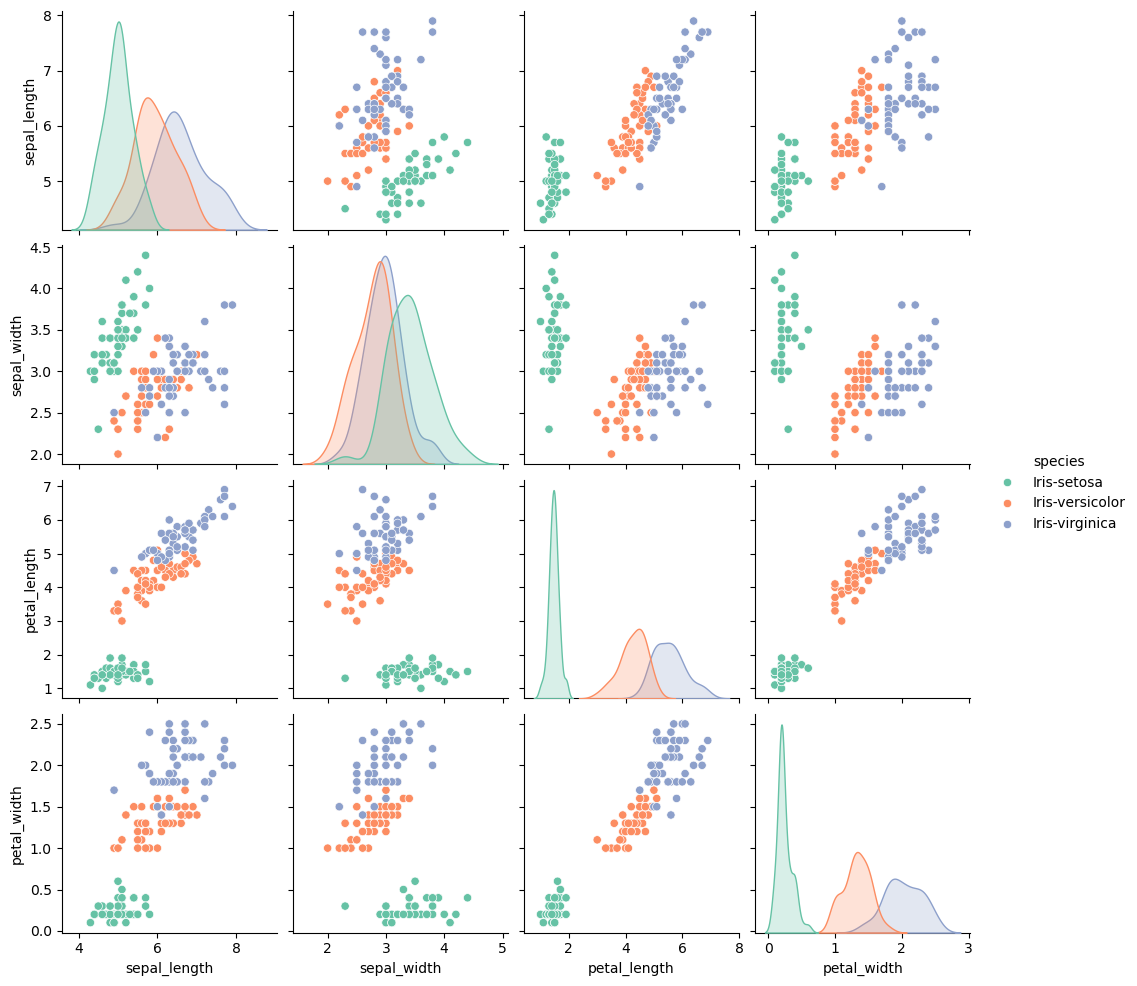

In [26]:
sns.pairplot(data=iris, hue='species', palette='Set2')



A pairplot visualizes relationships between all feature pairs, color-coded by species.  
This helps to visually assess the separability between species.


# 6. Dataset Summary

In [32]:
classes = iris['species'].unique().tolist()
classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Identify the unique species present in the dataset.

python
Copy
Edit


In [35]:
iris.groupby(['species']).mean()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Compute the mean of features for each species to observe feature distributions.

In [38]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Check data types, missing values, and general dataset information.



# 7. Preparing Data for Modeling



In [44]:
X = iris.drop('species', axis=1)
y = iris['species']


Features (X): All columns except species.

Target (y): species column.

# 8. Splitting into Train and Test Sets



In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)

We split the data into 70% training and 30% testing sets.

# 9. Building the Decision Tree Model

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt_iris = DecisionTreeClassifier()
dt_iris.fit(X_train, y_train)

DecisionTreeClassifier()

We instantiate and train a basic Decision Tree Classifier using default parameters.

# 10. Evaluating the Model (Training Set)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_train = dt_iris.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105

[[38  0  0]
 [ 0 32  0]
 [ 0  0 35]]
1.0


We evaluate performance on the training data using:

- **Classification Report**
- **Confusion Matrix**
- **Accuracy Score**



# 11. Evaluating the Model (Testing Set)

In [60]:
y_pred_default = dt_iris.predict(X_test)
print(classification_report(y_test, y_pred_default))
print(confusion_matrix(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
0.9555555555555556


Similarly, we assess the model's generalization to unseen (test) data.

# 12. Visualizing the Decision Tree

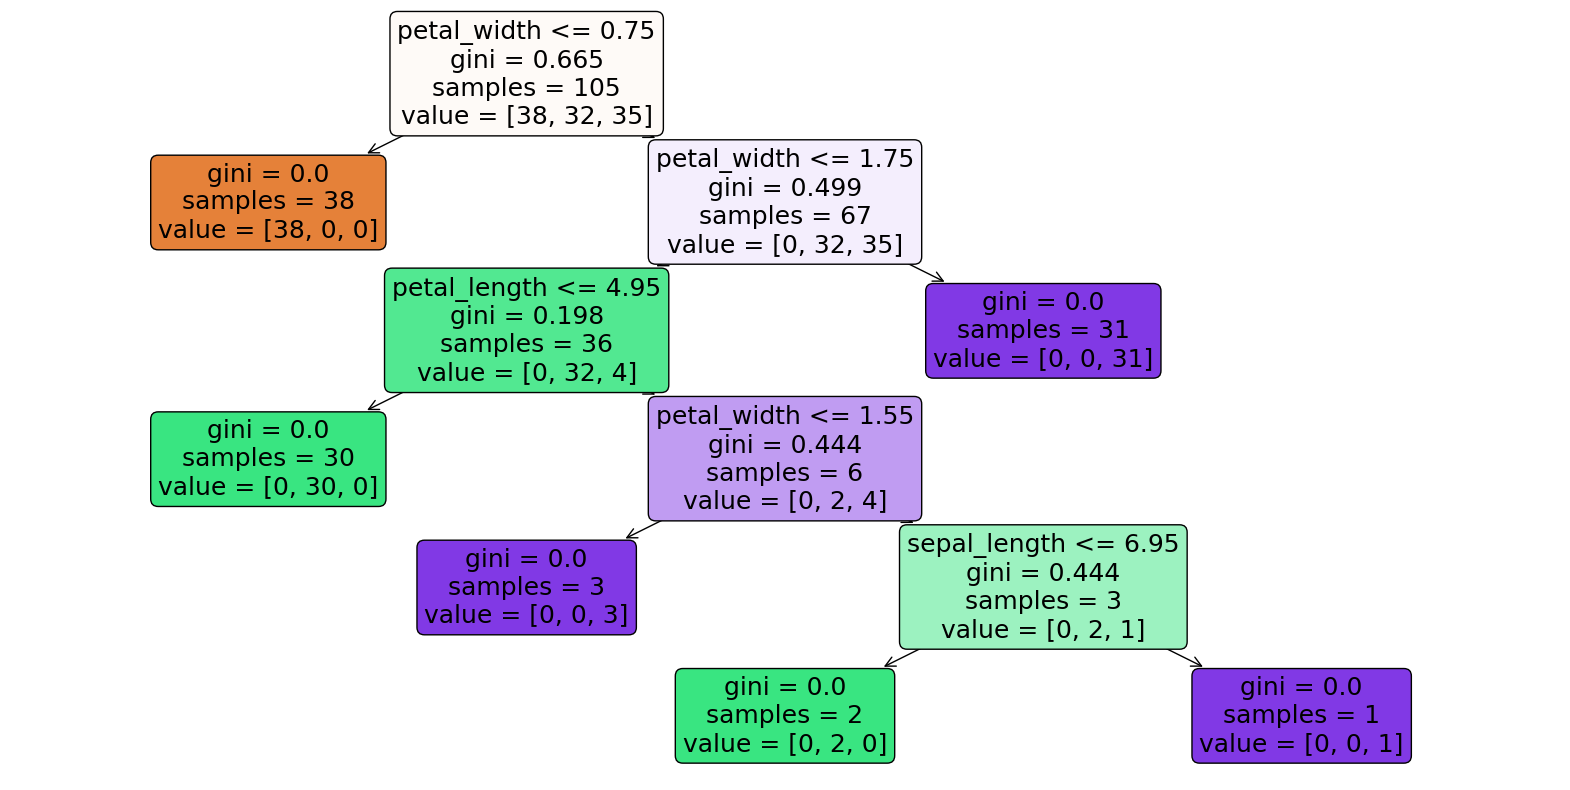

In [64]:
from sklearn.tree import plot_tree
features = list(X_train.columns)

plt.figure(figsize=(20, 10))
plot_tree(dt_iris, feature_names=features, filled=True, rounded=True)
plt.show()


A visual representation of the trained decision tree structure.

# 13. Hyperparameter Tuning
We now tune hyperparameters using GridSearchCV to improve performance.

# 13.1 Tuning max_depth

In [71]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': range(1, 10)}
dtree = DecisionTreeClassifier(criterion="gini", random_state=100)

tree = GridSearchCV(dtree, parameters, cv=5, scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

Plotting results:

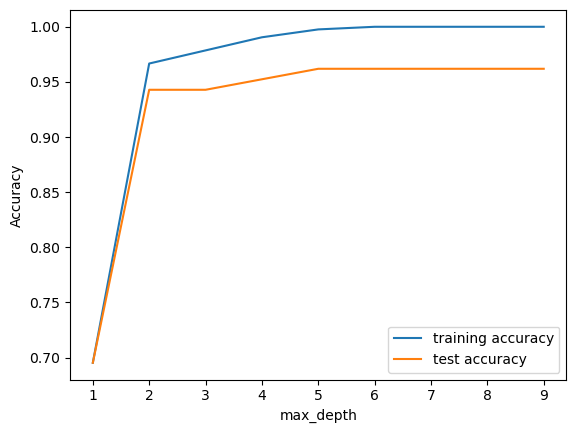

In [74]:
scores = tree.cv_results_
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# 13.2 Tuning min_samples_leaf

In [77]:
parameters = {'min_samples_split': range(3, 40, 3)}
tree = GridSearchCV(dtree, parameters, cv=5, scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(3, 40, 3)},
             return_train_score=True, scoring='accuracy')

Plotting results:

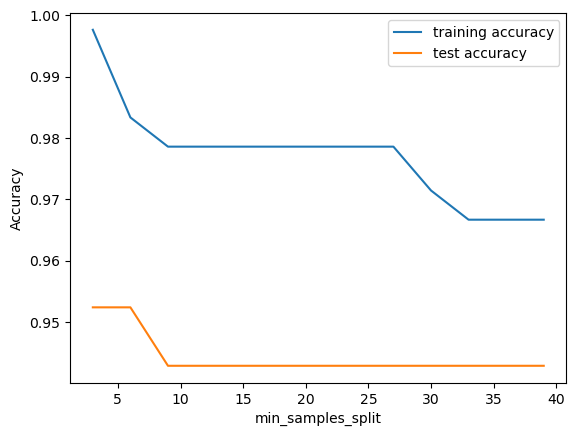

In [80]:
scores = tree.cv_results_
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## 13.4 Comprehensive Grid Search (All Parameters)

In [83]:
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 40, 2),
    'min_samples_split': range(2, 30, 2),
    'criterion': ["entropy", "gini"]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 40, 2),
                         'min_samples_split': range(2, 30, 2)},
             verbose=1)

Best Parameters:

In [85]:
print("Best Accuracy:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_estimator_)


Best Accuracy: 0.9714285714285715
Best Parameters: DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       min_samples_split=4)


# 14. Final Model Training

In [87]:
iristree1 = DecisionTreeClassifier(criterion="entropy", random_state=100,
                                   max_depth=4, min_samples_leaf=3,
                                   min_samples_split=2)
iristree1.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=100)

We retrain the model with optimal hyperparameters.

# 15. Final Model Evaluation

In [90]:
print(iristree1.score(X_test, y_test))


0.9555555555555556


Evaluate the optimized model on the test set.

# 16. Final Decision Tree Visualization

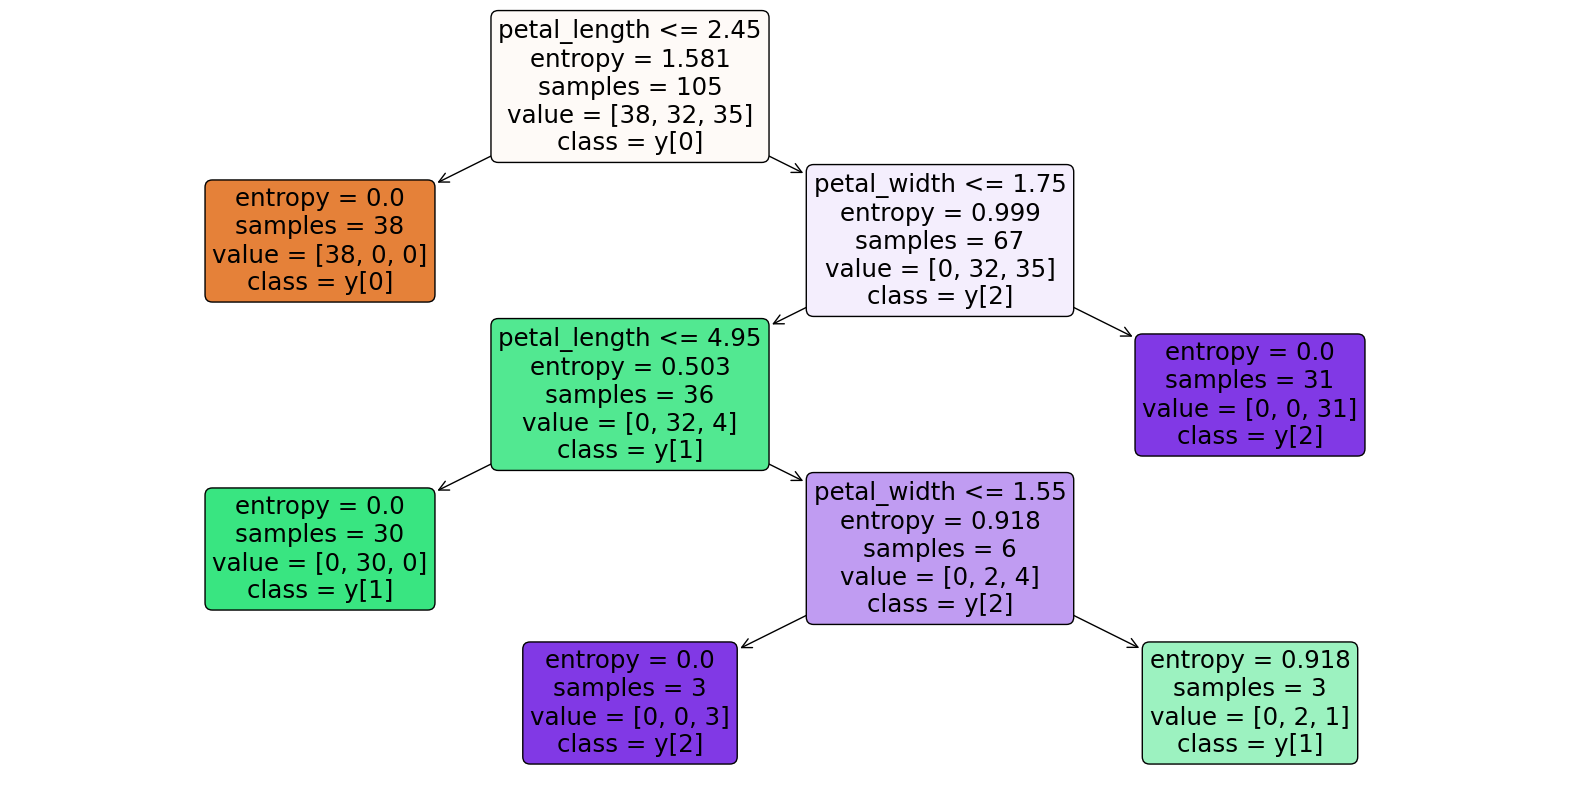

In [93]:
plt.figure(figsize=(20, 10))
plot_tree(iristree1, feature_names=features, filled=True, rounded=True, class_names=True)
plt.show()


Plot the final trained tree structure for interpretation.

# 7. Additional Experiment
We also trained a secondary decision tree with slightly different parameters:

In [ ]:
iristree2 = DecisionTreeClassifier(criterion="gini", random_state=100,
                                   max_depth=3, min_samples_leaf=4,
                                   min_samples_split=4)
iristree2.fit(X_train, y_train)
print(iristree2.score(X_test, y_test))


# 18. Conclusion
The Decision Tree model achieved high accuracy on both training and testing datasets.

Hyperparameter tuning significantly improved the model's generalization and avoided overfitting.

Visualization of the tree helped in understanding decision boundaries and feature importance.

The Iris dataset remains an excellent benchmark for classification tasks due to its simplicity and clear structure.
